In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
train.shape

(421570, 5)

In [6]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [7]:
test = pd.read_csv('test.csv')
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [9]:
test.shape

(115064, 4)

In [10]:
test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [11]:
features = pd.read_csv('features.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [13]:
features.shape

(8190, 12)

In [14]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [15]:
stores = pd.read_csv('stores.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [16]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [17]:
stores.shape

(45, 3)

In [18]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [19]:
df = features.merge(stores, how='inner', on='Store')

**merge()**

Parameters :
- right : DataFrame or named Series
- how : {‘left’, ‘right’, ‘outer’, ‘inner’}, default ‘inner’
- on : label or list
- left_on : label or list, or array-like
- right_on : label or list, or array-like
- left_index : bool, default False
- right_index : bool, default False
- sort : bool, default False
- suffixes : tuple of (str, str), default (‘_x’, ‘_y’)
- copy : bool, default True
- indicator : bool or str, default False
- validate : str, optional

Returns : A DataFrame of the two merged objects.

In [20]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [22]:
import datetime
df['Date'] = pd.to_datetime(df['Date'])

When a csv file is imported and a Data Frame is made, the Date time objects in the file are read as a string object rather a Date Time object and hence it's very tough to perform operations like _Time Difference_ on a string rather a _Date Time object_.

**Pandas to_datetime() method** helps to convert string Date time into Python Date time object.

**self.df["date"] = pd.to_datetime(self.df["date"]).dt.date returns just the DATE as OBJECT datatype.**

In [23]:
train['Date'] = pd.to_datetime(train['Date'])

In [24]:
final = train.merge(df, on=['Store', 'Date', 'IsHoliday'])

In [25]:
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [26]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [27]:
final['Week'] = final['Date'].dt.isocalendar().week

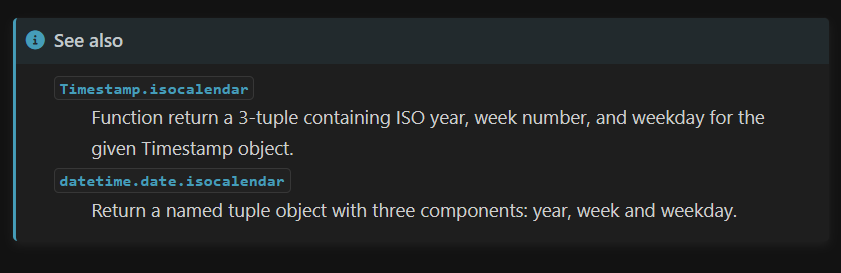

In [28]:
final['Year'] = final['Date'].dt.isocalendar().year

In [29]:
final['Date'].dt.day

0          5
1          5
2          5
3          5
4          5
          ..
421565    26
421566    26
421567    26
421568    26
421569    26
Name: Date, Length: 421570, dtype: int64

In [30]:
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010


In [31]:
final.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012


### Scatter Plot of weekly sales & column (we pass as argument)

In [32]:
def scatter(df, col):
    plt.figure(figsize = (15, 12))
    plt.scatter(x = df['Weekly_Sales'], y=df[col])
    plt.title('Weekly_Sales vs ' + str(col))
    plt.xlabel('Weekly_Sales')
    plt.ylabel(col)

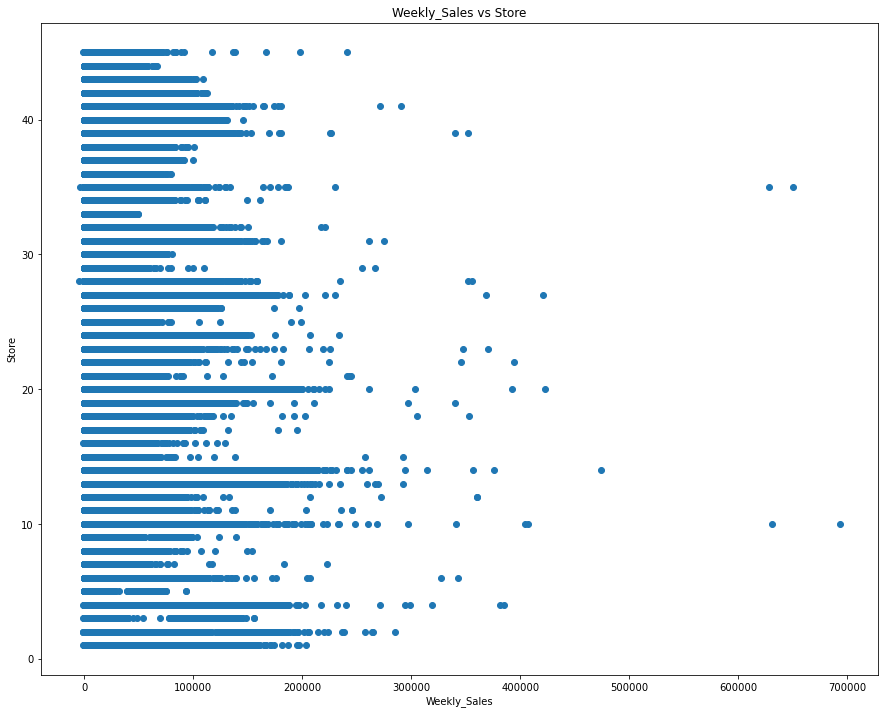

In [33]:
scatter(final, 'Store')

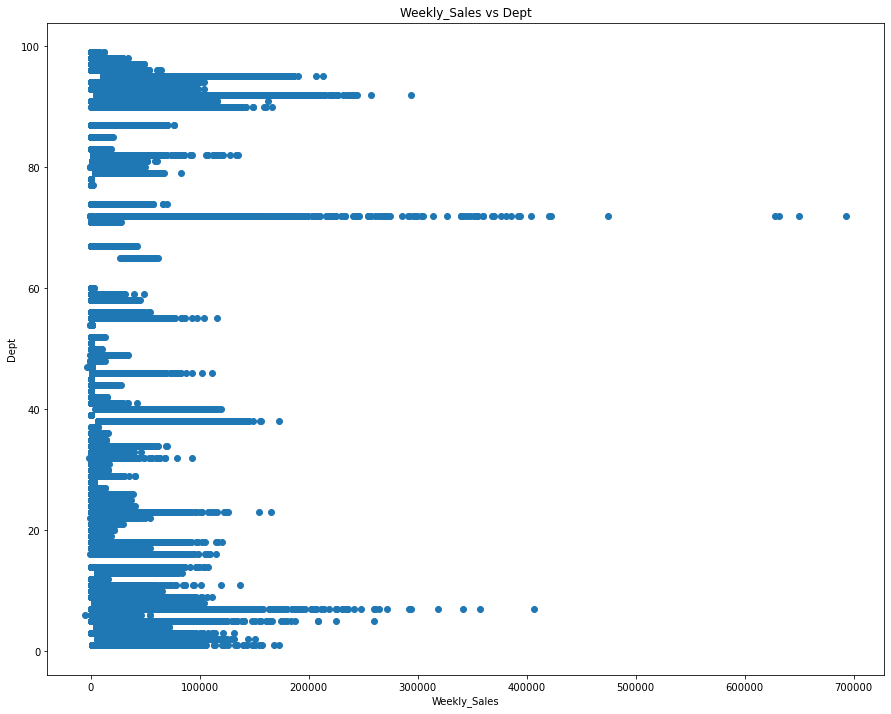

In [34]:
scatter(final, 'Dept')

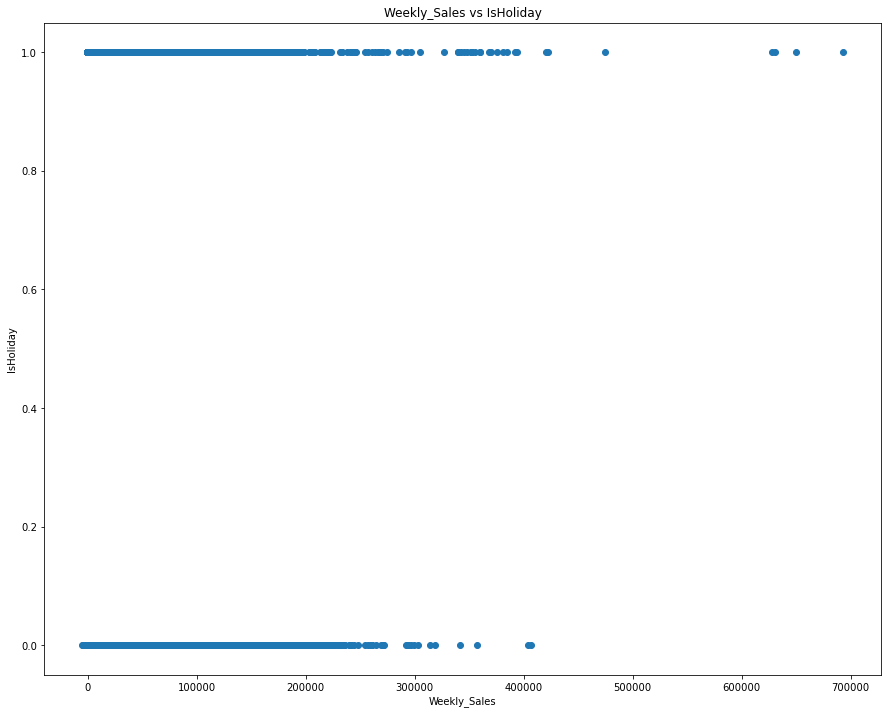

In [35]:
scatter(final, 'IsHoliday')

### Average weekly sales in 2011?

In [36]:
weekly_sales_2011 = final[final['Year'] == 2011].groupby(['Week'])['Weekly_Sales'].mean()

In [37]:
weekly_sales_2012 = final[final['Year'] == 2012].groupby(['Week'])['Weekly_Sales'].mean()

In [38]:
weekly_sales_2010 = final[final['Year'] == 2010].groupby(['Week'])['Weekly_Sales'].mean()

<AxesSubplot:xlabel='Week'>

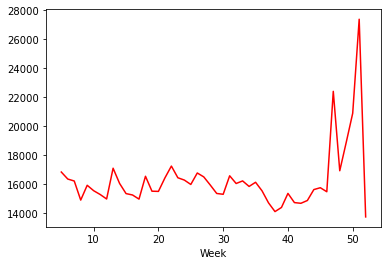

In [39]:
sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values, color='red')

<AxesSubplot:xlabel='Week'>

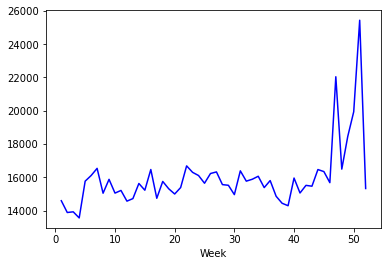

In [40]:
sns.lineplot(x = weekly_sales_2011.index, y = weekly_sales_2011.values, color = 'blue')

<AxesSubplot:xlabel='Week'>

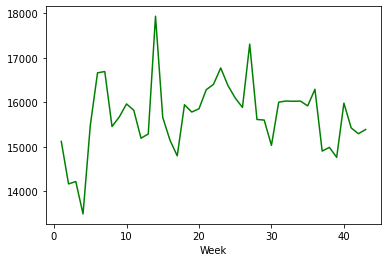

In [41]:
sns.lineplot(x = weekly_sales_2012.index, y = weekly_sales_2012.values, color = 'green')

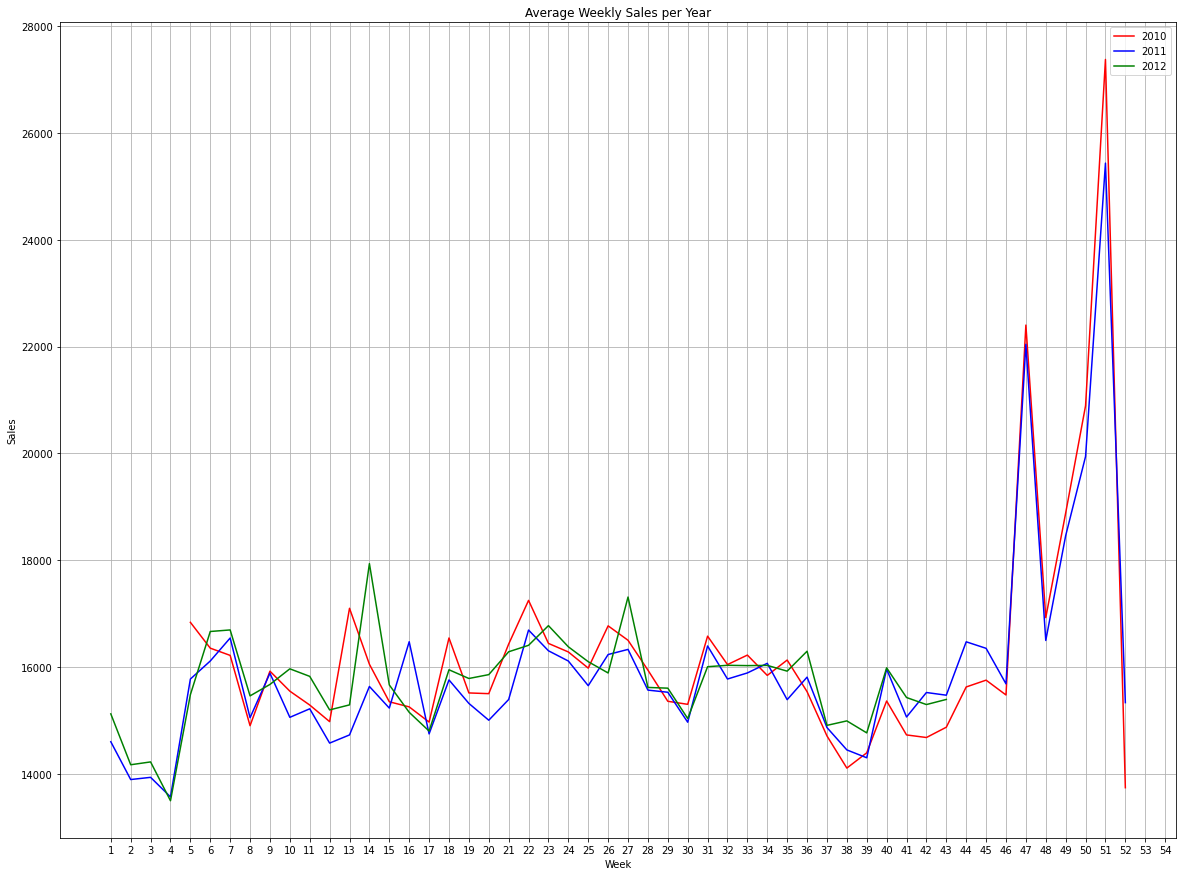

In [42]:
plt.figure(figsize = (20, 15))
sns.lineplot(x = weekly_sales_2010.index, y = weekly_sales_2010.values, color = 'red')
sns.lineplot(x = weekly_sales_2011.index, y = weekly_sales_2011.values, color = 'blue')
sns.lineplot(x = weekly_sales_2012.index, y = weekly_sales_2012.values, color = 'green')
plt.xticks(np.arange(1, 55, step=1))
plt.grid()
plt.title('Average Weekly Sales per Year')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend(['2010', '2011', '2012'])

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Count'>

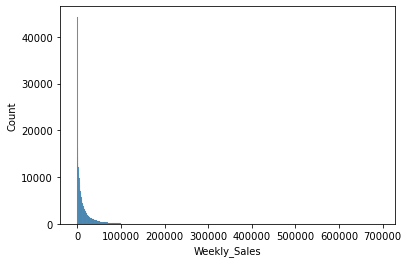

In [43]:
sns.histplot(final['Weekly_Sales'])

<AxesSubplot:xlabel='Type', ylabel='Size'>

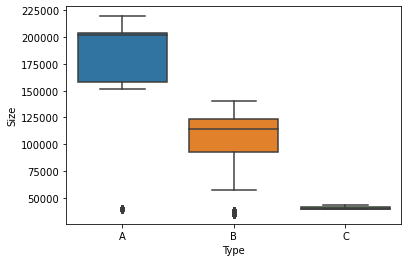

In [44]:
sns.boxplot(x = 'Type', y = 'Size', data = final)

### Store with highest average weekly sales?

In [45]:
store_weekly_sales = final['Weekly_Sales'].groupby(final['Store']).mean()

In [46]:
store_weekly_sales

Store
1     21710.543621
2     26898.070031
3      6373.033983
4     29161.210415
5      5053.415813
6     21913.243624
7      8358.766148
8     13133.014768
9      8772.890379
10    26332.303819
11    19276.762751
12    14867.308619
13    27355.136891
14    28784.851727
15     9002.493073
16     7863.224124
17    12954.393636
18    15733.313136
19    20362.126734
20    29508.301592
21    11283.435496
22    15181.218886
23    19776.180881
24    18969.106500
25    10308.157810
26    14554.129672
27    24826.984536
28    18714.889803
29     8158.810609
30     8764.237719
31    19681.907464
32    16351.621855
33     5728.414053
34    13522.081671
35    13803.596986
36     8584.412563
37    10297.355026
38     7492.478460
39    21000.763562
40    13763.632803
41    17976.004648
42    11443.370118
43    13415.114118
44     6038.929814
45    11662.897315
Name: Weekly_Sales, dtype: float64

In [47]:
store_weekly_sales_df = pd.DataFrame(store_weekly_sales)

In [48]:
store_weekly_sales_df

,Weekly_Sales
Store,
1,21710.543621
2,26898.070031
3,6373.033983
4,29161.210415
5,5053.415813
6,21913.243624
7,8358.766148
8,13133.014768
9,8772.890379


In [49]:
store_weekly_sales_df.sort_values("Weekly_Sales", ascending=False).style.bar(color = '#FFD200')

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


- Store 20 - Highest sales
- Store 5  - Lowest sales

In [50]:
final[final['Store'] == 20]['Type'].unique()

array(['A'], dtype=object)

In [51]:
final[final['Store'] == 5]['Type'].unique()

array(['B'], dtype=object)

Text(0, 0.5, 'Weekly Sales')

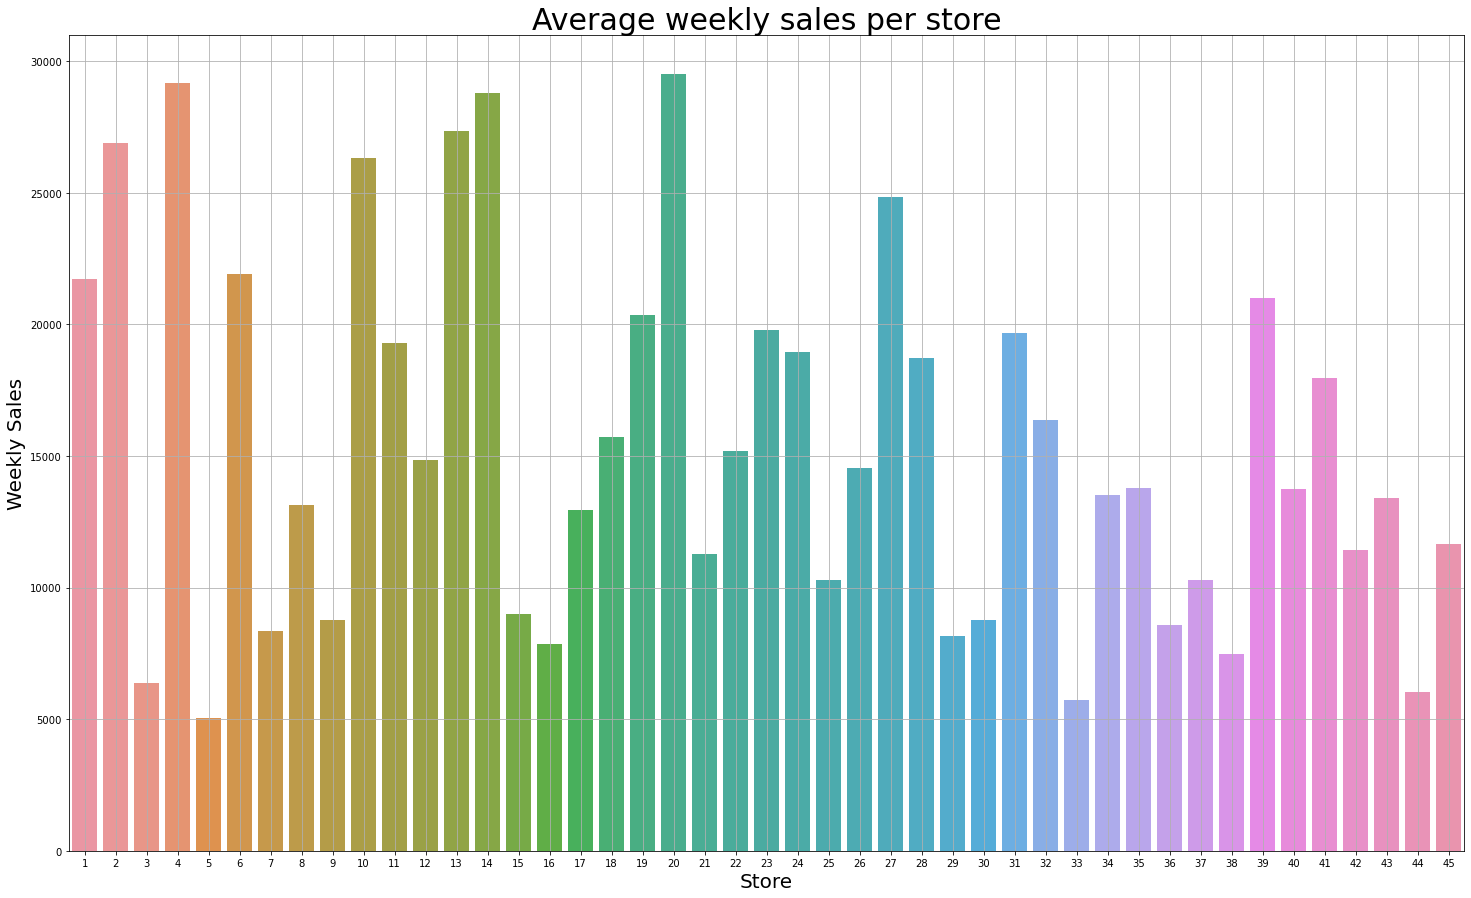

In [52]:
plt.figure(figsize = (25,15))
sns.barplot(x = store_weekly_sales_df.index, y = store_weekly_sales.values)
plt.grid()
plt.title('Average weekly sales per store', fontsize = 30)
plt.xlabel('Store', fontsize = 20)
plt.ylabel('Weekly Sales', fontsize = 20)

### Average Weekly Sales per Department?

In [53]:
dept_weekly_sales = final.groupby(['Dept'])['Weekly_Sales'].mean()

In [54]:
dept_weekly_sales

Dept
1     19213.485088
2     43607.020113
3     11793.698516
4     25974.630238
5     21365.583515
          ...     
95    69824.423080
96    15210.942761
97    14255.576919
98     6824.694889
99      415.487065
Name: Weekly_Sales, Length: 81, dtype: float64

In [55]:
dept_weekly_sales_df = pd.DataFrame(dept_weekly_sales)

In [56]:
dept_weekly_sales_df

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515
...,...
95,69824.423080
96,15210.942761
97,14255.576919


In [57]:
dept_weekly_sales_df.sort_values('Weekly_Sales', ascending = False).style.bar()

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


- Department 92 - Highest Sales
- Department 43 - Lowest Sales

Text(0, 0.5, 'Weekly Sales')

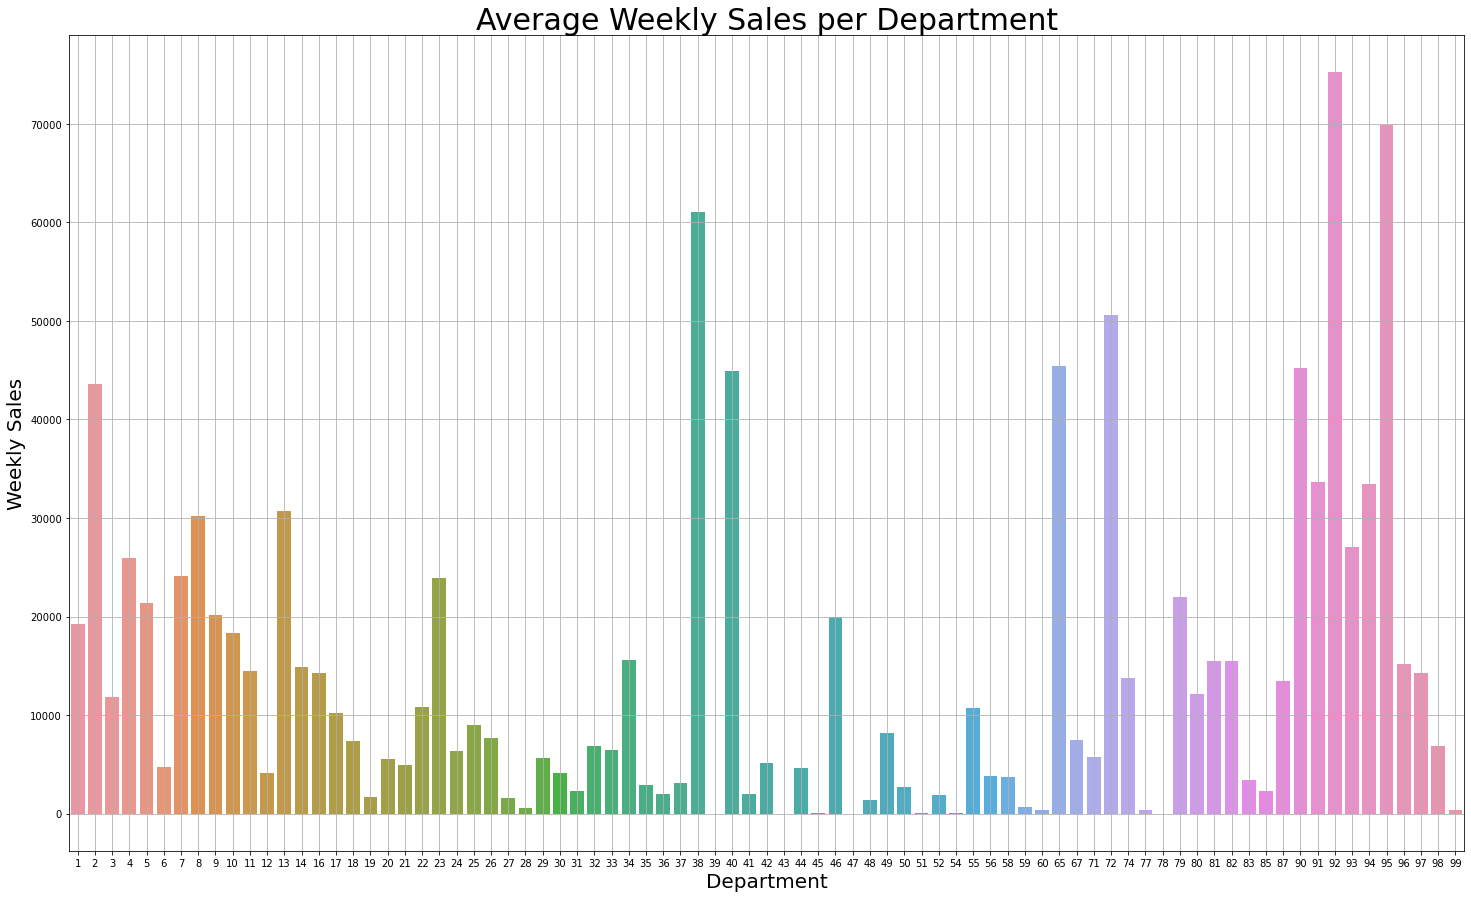

In [58]:
plt.figure(figsize=(25, 15))
sns.barplot(x = dept_weekly_sales.index, y = dept_weekly_sales.values)
plt.grid()
plt.title('Average Weekly Sales per Department', fontsize = 30)
plt.xlabel('Department', fontsize = 20)
plt.ylabel('Weekly Sales', fontsize = 20)

### Correlation b/w features

<AxesSubplot:>

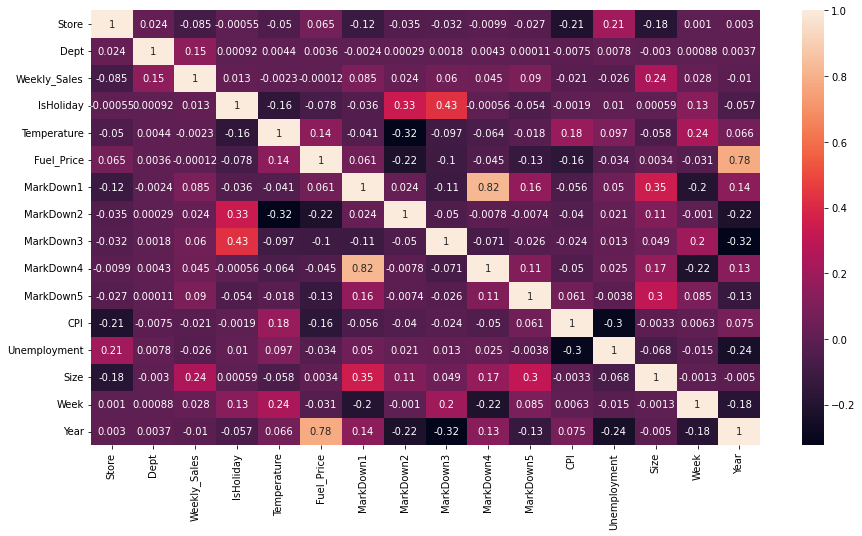

In [59]:
plt.figure(figsize = (15, 8))
sns.heatmap(final.corr(), annot = True)

# Conclusions:

- Department 92 having highest sales
- Store 20 having highest sales
- Store 5 have lowest sales
- Department 43 have lowest sales
- All years display same pattern and we can clearly see higher sales in the end weeks of the year.
- We can see some higher sales scenarios when isHoliday is true
- Type a stores have the larger size whereas type c stores have the smaller size.
- Store 20 that have highest sales belongs so type a whereas store 5 that have lowest sales belong to type c
- Higher correlation between fuel prices and years.

### Authored by:

[Soumya Kushwaha](https://github.com/Soumya-Kushwaha)